<a href="https://colab.research.google.com/github/yanipark/2025_HighTecker-projects/blob/main/%ED%8C%90%EB%8B%A4%EC%8A%A4_01_%ED%8C%90%EB%8B%A4%EC%8A%A4_%EC%99%80_%EC%B0%A8%ED%8A%B8(matplotlib)_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [판다스 기본]


### 1. 데이터프레임제작
- 외부자료 csv 또는 엑셀자료를 불러 사용할수 있음.

In [ ]:
import pandas as pd

data=dict({
           '지역': ['지역1','지역2','지역3','지역4','지역5'],
           '강수량': [5,5,5,4,6],
           '온도': [4,4,10,5,2]
         } )


df = pd.DataFrame(data)
df

,지역,강수량,온도
0,지역1,5,4
1,지역2,5,4
2,지역3,5,10
3,지역4,4,5
4,지역5,6,2


In [ ]:
df.head()  #기본5개, df.head(7) 숫자를 넣어갯수지정가능

,지역,강수량,온도
0,지역1,5,4
1,지역2,5,4
2,지역3,5,10
3,지역4,4,5
4,지역5,6,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      5 non-null      object
 1   강수량     5 non-null      int64 
 2   온도      5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes


In [ ]:
df.describe()

,강수량,온도
count,5.000000,5.0
mean,5.000000,5.0
std,0.707107,3.0
min,4.000000,2.0
25%,5.000000,4.0
50%,5.000000,4.0
75%,5.000000,5.0
max,6.000000,10.0


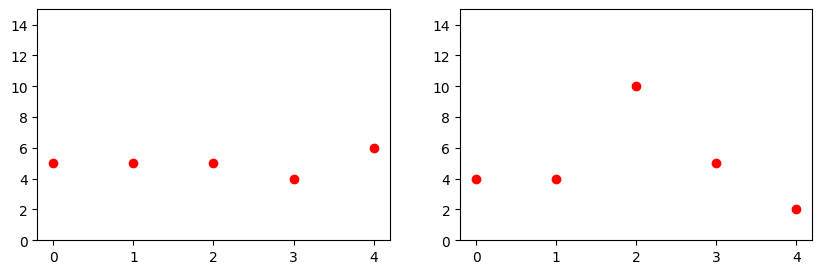

In [ ]:
## 참고: 시각화를 통한 값의 분포도
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))  # 너비10, 높이3
plt.subplot(1,2,1)  # 1행2열의 크기를 정하고 그중 첫번째 위치

plt.ylim([0, 15])  # y값을 0~15 로 정함
plt.plot(df['강수량'], 'ro')  # 강수량 값을 출력하는데 'red, 원모양으로출력'


plt.subplot(1,2,2)  # 1행2열의 크기를 정하고 그중 두번째위치

plt.ylim([0, 15])
plt.plot(df['온도'], 'ro')

### 2. 컬럼(필드)별 계산
- 각 컬럼(필드)명을 이용한 기술통계가 가능합니다.
- df.columns로 컬럼명 확인가능합니다.

In [ ]:
df.columns

Index(['지역', '강수량', '온도'], dtype='object')

In [ ]:
print(df['강수량'].sum())
print(df['온도'].sum())

25
25


In [ ]:
컬럼='강수량'
df[컬럼].mean() #평균

5.0

In [ ]:
def 평균구하기(컬럼명):
    print(컬럼명 + '의 평균은==>', df[컬럼명].mean())

평균구하기('강수량')

강수량의 평균은==> 5.0


In [ ]:
평균구하기('온도')

온도의 평균은==> 5.0


In [ ]:
컬럼명=['강수량','온도']
for x in 컬럼명:
    평균구하기(x)

강수량의 평균은==> 5.0
온도의 평균은==> 5.0


In [ ]:
컬럼명=df.columns
컬럼명, 컬럼명[1:]

(Index(['지역', '강수량', '온도'], dtype='object'),
 Index(['강수량', '온도'], dtype='object'))

In [ ]:
컬럼명=df.columns[1:]
for x in 컬럼명:
    평균구하기(x)

강수량의 평균은==> 5.0
온도의 평균은==> 5.0


### 3. 조건문


In [ ]:
df['온도']>=5

0    False
1    False
2     True
3     True
4    False
Name: 온도, dtype: bool

In [ ]:
df[df['온도']>=5]

,지역,강수량,온도
2,지역3,5,10
3,지역4,4,5


In [ ]:
(df['강수량']>=5)& (df['온도']>=5)

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [ ]:
df[(df['강수량']>=5)& (df['온도']>=5)]

,지역,강수량,온도
2,지역3,5,10


### 4. 필드계산

In [ ]:
df['비고']='판다스_기초자료'
df['강수량계산']=df['강수량']*0.1
df


,지역,강수량,온도,비고,강수량계산
0,지역1,5,4,판다스_기초자료,0.5
1,지역2,5,4,판다스_기초자료,0.5
2,지역3,5,10,판다스_기초자료,0.5
3,지역4,4,5,판다스_기초자료,0.4
4,지역5,6,2,판다스_기초자료,0.6


In [ ]:
df['비고'].str.split('_')

0    [판다스, 기초자료]
1    [판다스, 기초자료]
2    [판다스, 기초자료]
3    [판다스, 기초자료]
4    [판다스, 기초자료]
Name: 비고, dtype: object

In [ ]:
df['비고'].str.split('_').str[0]

0    판다스
1    판다스
2    판다스
3    판다스
4    판다스
Name: 비고, dtype: object

In [ ]:
df['과정명']=df['비고'].str.split('_').str[0]
df

,지역,강수량,온도,비고,강수량계산,과정명
0,지역1,5,4,판다스_기초자료,0.5,판다스
1,지역2,5,4,판다스_기초자료,0.5,판다스
2,지역3,5,10,판다스_기초자료,0.5,판다스
3,지역4,4,5,판다스_기초자료,0.4,판다스
4,지역5,6,2,판다스_기초자료,0.6,판다스


### 5. 필드 인덱싱

In [ ]:
df.loc[0]

지역            지역1
강수량             5
온도              4
비고       판다스_기초자료
강수량계산         0.5
과정명           판다스
Name: 0, dtype: object

In [ ]:
df.loc[2:4]

,지역,강수량,온도,비고,강수량계산,과정명
2,지역3,5,10,판다스_기초자료,0.5,판다스
3,지역4,4,5,판다스_기초자료,0.4,판다스
4,지역5,6,2,판다스_기초자료,0.6,판다스


In [ ]:
df

,지역,강수량,온도,비고,강수량계산,과정명
0,지역1,5,4,판다스_기초자료,0.5,판다스
1,지역2,5,4,판다스_기초자료,0.5,판다스
2,지역3,5,10,판다스_기초자료,0.5,판다스
3,지역4,4,5,판다스_기초자료,0.4,판다스
4,지역5,6,2,판다스_기초자료,0.6,판다스


In [ ]:
df.iloc[:,2]  # df['온도']와 같음

0     4
1     4
2    10
3     5
4     2
Name: 온도, dtype: int64

## [차트기초]

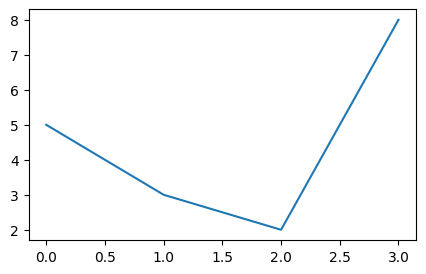

In [ ]:
import matplotlib.pyplot as plt
a=[5,3,2,8]

plt.figure(figsize=(5,3))
plt.plot(a)
plt.show()

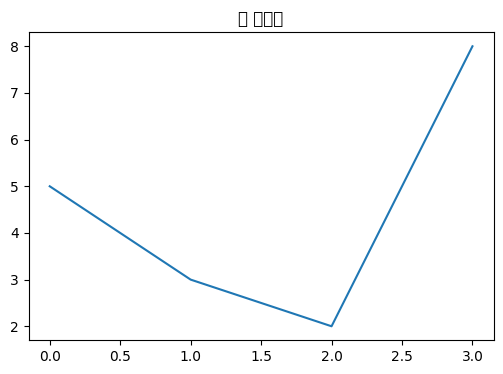

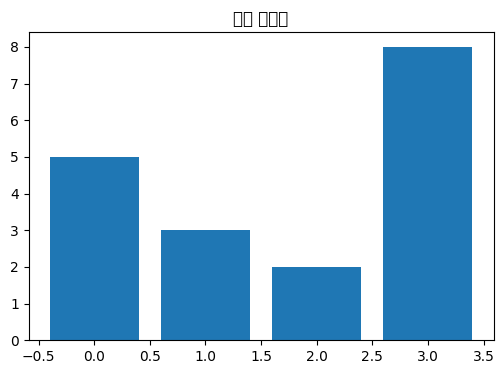

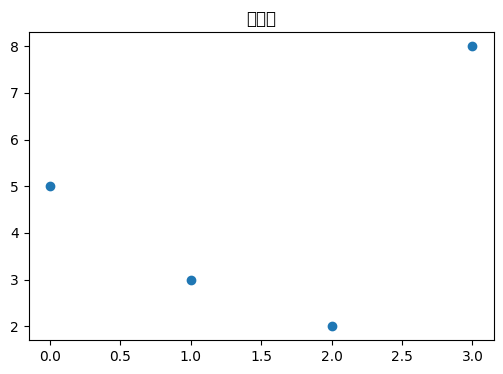

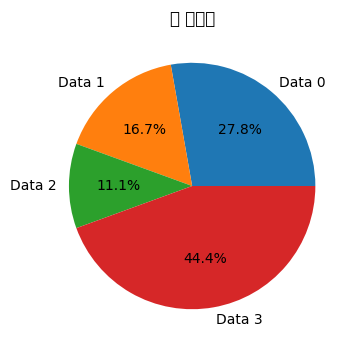

In [ ]:
# chatgpt 명령 'a=[5,3,2,8] 값으로 그릴수 있는 차트 모두'
import matplotlib.pyplot as plt

a = [5, 3, 2, 8]

# 선 그래프
plt.figure(figsize=(6, 4))
plt.plot(a)
plt.title('선 그래프')
plt.show()

# 막대 그래프
plt.figure(figsize=(6, 4))
plt.bar(range(len(a)), a)
plt.title('막대 그래프')
plt.show()

# 산점도
plt.figure(figsize=(6, 4))
plt.scatter(range(len(a)), a)
plt.title('산점도')
plt.show()

# 원 그래프
plt.figure(figsize=(6, 4))
plt.pie(a, labels=[f'Data {i}' for i in range(len(a))], autopct='%1.1f%%')
plt.title('원 그래프')
plt.show()


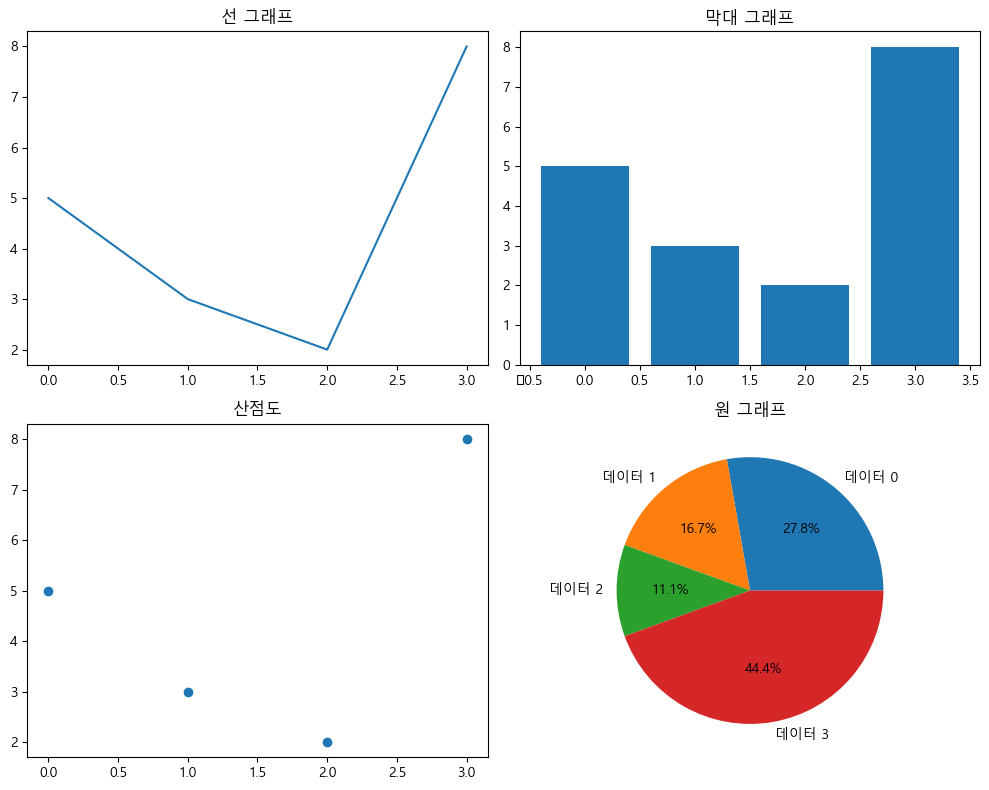

In [ ]:
# chatGPT 'a=[5,3,2,8] 값으로 그릴수 있는 차트 모두 한글깨짐, 2줄에 모두
'
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 설정 (예시: 나눔고딕)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 나눔고딕 폰트의 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

a = [5, 3, 2, 8]

# 차트 모두 한글로 표시
plt.figure(figsize=(10, 8))

# 선 그래프
plt.subplot(221)
plt.plot(a)
plt.title('선 그래프')

# 막대 그래프
plt.subplot(222)
plt.bar(range(len(a)), a)
plt.title('막대 그래프')

# 산점도
plt.subplot(223)
plt.scatter(range(len(a)), a)
plt.title('산점도')

# 원 그래프
plt.subplot(224)
plt.pie(a, labels=[f'데이터 {i}' for i in range(len(a))], autopct='%1.1f%%')
plt.title('원 그래프')

plt.tight_layout()
plt.show()


## [판다스 자료와 차트]

In [ ]:
df

,지역,강수량,온도,비고,강수량계산,과정명
0,지역1,5,4,판다스_기초자료,0.5,판다스
1,지역2,5,4,판다스_기초자료,0.5,판다스
2,지역3,5,10,판다스_기초자료,0.5,판다스
3,지역4,4,5,판다스_기초자료,0.4,판다스
4,지역5,6,2,판다스_기초자료,0.6,판다스


Text(0.5, 1.0, '지역별 온도')

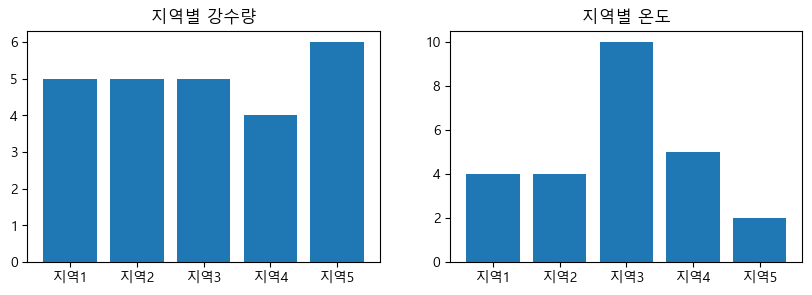

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.bar(df['지역'],df['강수량'])
plt.title('지역별 강수량')

plt.subplot(122)
plt.bar(df['지역'],df['온도'])
plt.title('지역별 온도')


Text(0.5, 1.0, '온도 원차트')

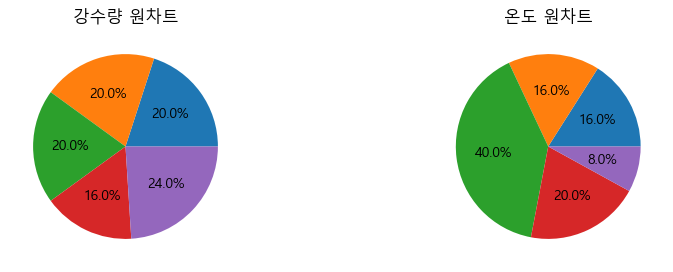

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.pie(df['강수량'],autopct='%1.1f%%')
plt.title('강수량 원차트')

plt.subplot(122)
plt.pie(df['온도'],autopct='%1.1f%%')
plt.title('온도 원차트')

Text(0.5, 1.0, '온도 산점도')

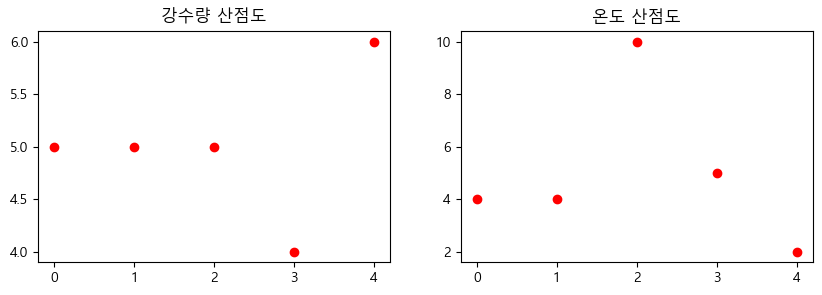

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(df['강수량'],'ro')
plt.title('강수량 산점도')

plt.subplot(122)
plt.plot(df['온도'],'ro')
plt.title('온도 산점도')